In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784',version=1)
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [2]:
X, y = mnist['data'],mnist['target']
print(X.shape,y.shape)

(70000, 784) (70000,)


In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[30]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap='binary')
plt.axis('off')
plt.show()

<Figure size 640x480 with 1 Axes>

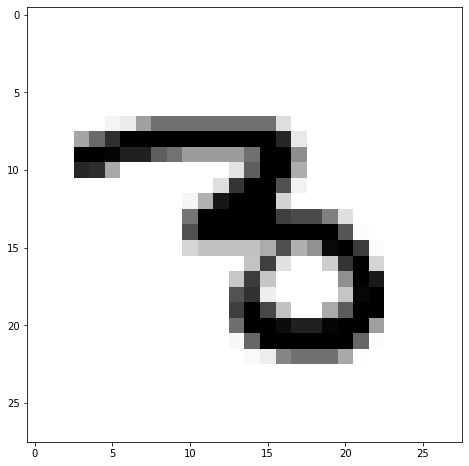

In [4]:
fig, ax = plt.subplots(1,figsize=(8,8))
ax.imshow(some_digit_image,cmap='binary')

In [5]:
X_train, X_test, y_train, y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [6]:
y_train_5 = (y_train == '5')

In [7]:
y_test_5 = (y_test == '5')

In [8]:
from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier(random_state=43)
sgd_model.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=43, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [9]:
sgd_model.predict([some_digit])

array([False])

In [10]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_model, X_train, y_train_5, cv=10,scoring='accuracy')

array([0.96750542, 0.954     , 0.96416667, 0.96683333, 0.9655    ,
       0.95683333, 0.9585    , 0.96633333, 0.96116667, 0.97066178])

In [11]:
#naive model
from sklearn.base import BaseEstimator, TransformerMixin

class Never5Classifier(BaseEstimator, TransformerMixin):
    def __init__(self):
        return
    
    def fit(self,X,y=None):
        return self
    
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)
    
    def transform(self, X):
        return self

In [12]:
import numpy as np
import pandas as pd
naive_model=Never5Classifier()
cross_val_score(naive_model,X_train,y_train_5,cv = 4, scoring='accuracy')

array([0.91213333, 0.90726667, 0.9102    , 0.909     ])

In [13]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_model,X_train, y_train_5, cv=3)

In [14]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5,y_train_pred)

array([[53756,   823],
       [ 1312,  4109]], dtype=int64)

In [15]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8331305758313058

In [16]:
recall_score(y_train_5,y_train_pred)

0.7579782327983767

In [17]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7937795807978364

In [18]:
y_scores = sgd_model.decision_function([some_digit])
y_scores

array([-14022.59191171])

In [19]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [20]:
y_scores = cross_val_predict(sgd_model, X_train, y_train_5, cv=3, method='decision_function')

In [21]:
from sklearn.metrics import precision_recall_curve
precision,recall,thresholds = precision_recall_curve(y_train_5,y_scores)

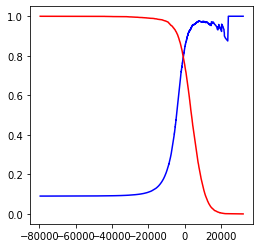

In [22]:
fig, ax = plt.subplots(figsize=[4,4])
ax.plot(thresholds, precision[:-1],'b-',label='precision')
ax.plot(thresholds, recall[:-1],'r-',label='recall')

In [23]:
from sklearn.metrics import roc_curve

fpr, tpr, threshold = roc_curve(y_train_5, y_scores)

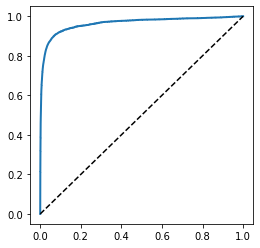

In [24]:
fig, ax = plt.subplots(figsize=[4,4])
ax.plot(fpr,tpr,linewidth=2,label=None)
ax.plot([0,1],[0,1],'k--')

In [25]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores)

0.9635950398529254

C:\Users\kawang\Desktop\Advisory Project\JE Testing\Forecast_Python_Package_V3\jeForecastVenv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\kawang\Desktop\Advisory Project\JE Testing\Forecast_Python_Package_V3\jeForecastVenv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\kawang\Desktop\Advisory Project\JE Testing\Forecast_Python_Package_V3\jeForecastVenv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


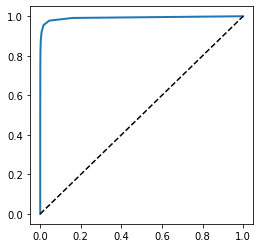

In [26]:
from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_model,X_train, y_train_5,
                                   cv=3, method='predict_proba')

fpr,tpr,threshold=roc_curve(y_train_5, y_probas_forest[:,1])

fig,ax = plt.subplots(figsize = [4,4])
ax.plot(fpr,tpr, linewidth=2)
ax.plot([0,1],[0,1],'k--')

In [27]:
roc_auc_score(y_train_5,y_probas_forest[:,1])

0.9920527492698306

In [28]:
y_train_pred_forest = cross_val_predict(forest_model, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

C:\Users\kawang\Desktop\Advisory Project\JE Testing\Forecast_Python_Package_V3\jeForecastVenv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\kawang\Desktop\Advisory Project\JE Testing\Forecast_Python_Package_V3\jeForecastVenv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\kawang\Desktop\Advisory Project\JE Testing\Forecast_Python_Package_V3\jeForecastVenv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.986046511627907

In [29]:
recall_score(y_train_5, y_train_pred_forest)

0.8212506917542889

In [ ]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train,y_train)
svm_clf.predict([some_digit])

C:\Users\kawang\Desktop\Advisory Project\JE Testing\Forecast_Python_Package_V3\jeForecastVenv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
